In [1]:
import numpy as np
import numpy.random as nrand
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rcParams_dict = {
    'xtick.bottom': True,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'patch.edgecolor':'k',
    'patch.force_edgecolor': True,
    'font.size': 15,
    'pdf.fonttype':42,
    'font.family':'Arial',
    'mathtext.fontset':'custom',
    'mathtext.default': 'regular',
    'mathtext.it': 'Arial:italic',
    'mathtext.it': 'Arial:italic',
}
mpl.rcParams.update(rcParams_dict)

In [24]:
# Collect simulations starting with a single mutant copy

# Effective populaiton size N
N = 1000

# Geometric mean fitness of fixed simulations
fitness_gmean_fixed_list = []

# Geometric mean fitness of lost simulations
fitness_gmean_lost_list = []

# Effective fitness of fixed simulations
fitness_e_fixed_list = []

# Effective fitness of lost simulations
fitness_e_lost_list = []

# Expected allele frequency change caused by selection in fixed simulations
dAF_mean_fixed_list = []

# Expected allele frequency change caused by selection in lost simulations
dAF_mean_lost_list = []

# Contribution of selection to the allele frequency change in fixed simulations
C_fixed_list = []

# Contribution of selection to the allele frequency change in lost simulations
C_lost_list = []

# Number of fixed simulations
N_fixed = 0

# Number of lost simulations
N_lost = 0

# Start the simulation with a single mutant copy
A_ini = 1

# Stop if at least 5000 simulations are collected for both categories.
while (N_fixed < 5000) or (N_lost < 5000):
    
    A = A_ini
    s = 0.1
    
    # Pick initial fitness randomly.
    if nrand.uniform()<0.5:
        s = 1/(1+s)-1
    
    dAF_list = []
    fitness_list = []
    
    # Start evolution until fixation or loss.
    while True:
        # Switch fitness with probability of 0.05
        if nrand.uniform()<0.05:
            s = 1/(1+s)-1
        AF = A/N
        dAF = s*AF*(1-AF)/(1+s*AF)
        dAF_list.append(dAF)
        fitness_list.append(1+s)
        P = A*(1+s)/(s*A+N)
        A = nrand.binomial(N,p=P)
        if (A == N) or (A == 0):
            break
    
    fitness_gmean = np.product(fitness_list)**(1/len(fitness_list))
    dAF_mean = np.mean(dAF_list)
    fitness_effective = (1+2*dAF_mean)/(1-2*dAF_mean)
    dAF_sel = np.sum(dAF_list)
    dAF_dft = (A/N-A_ini/N) - dAF_sel
    C = dAF_sel/(np.abs(dAF_sel)+np.abs(dAF_dft))
    
    # If the mutant get fixed
    if A == N:
        fitness_gmean_fixed_list.append(fitness_gmean)
        fitness_e_fixed_list.append(fitness_effective)
        dAF_mean_fixed_list.append(dAF_mean)
        C_fixed_list.append(C)
        N_fixed += 1
        
    # If the mutant get lost
    else:
        fitness_gmean_lost_list.append(fitness_gmean)
        fitness_e_lost_list.append(fitness_effective)
        dAF_mean_lost_list.append(dAF_mean)
        C_lost_list.append(C)
        N_lost += 1
        
    if N_fixed%100 == 0:
        print((N_fixed),end='\r',flush=True)

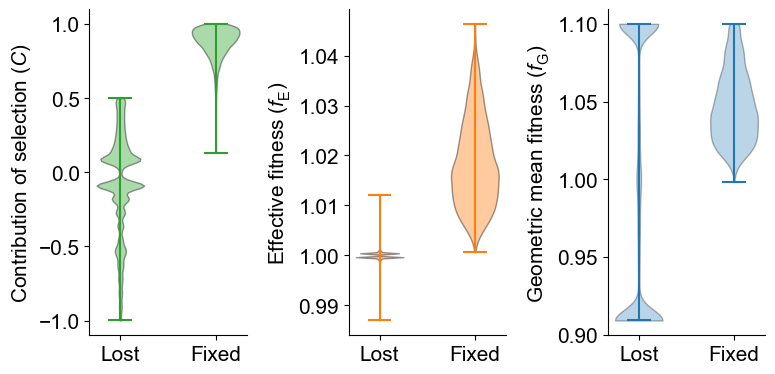

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the results

fig,axes = plt.subplots(1,3,figsize=[8,4])
ax1,ax2,ax3 = axes
ax3.violinplot([fitness_gmean_lost_list,fitness_gmean_fixed_list],positions=[0,1])
parts = ax2.violinplot([fitness_e_lost_list,fitness_e_fixed_list],positions=[0,1])

for pc in parts['bodies']:
    pc.set_facecolor('C1')
    pc.set_edgecolor('black')
    pc.set_alpha(0.4)
    
for pc in [parts['cbars'],parts['cmaxes'],parts['cmins']]:
    pc.set_facecolor('C1')
    pc.set_edgecolor('C1')
    pc.set_alpha(1)
    
parts = ax1.violinplot([C_lost_list,C_fixed_list],positions=[0,1])

for pc in parts['bodies']:
    pc.set_facecolor('C2')
    pc.set_edgecolor('black')
    pc.set_alpha(0.4)
    
for pc in [parts['cbars'],parts['cmaxes'],parts['cmins']]:
    pc.set_facecolor('C2')
    pc.set_edgecolor('C2')
    pc.set_alpha(1)

ax3.set_ylabel('Geometric mean fitness ($\mathit{f}_G$)')
ax2.set_ylabel('Effective fitness ($\mathit{f}_E$)')
ax1.set_ylabel('Contribution of selection ($\mathit{C}$)')

ax3.set_xticks([0,1],['Lost','Fixed'])
ax2.set_xticks([0,1],['Lost','Fixed'])
ax1.set_xticks([0,1],['Lost','Fixed'])

plt.tight_layout(w_pad=1)
plt.show()
#plt.savefig('Figure4.pdf')